## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_26-31-05-23.csv', firstRow=540, lastRow=546)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_290523_S541-546.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=54s and ended at t=484s; mass=44.83165g
This equals a volume of 44.921m; expected was 45.251mL; error is 0.728%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.0015 g/s and for 2nd derivative = 0.000375 g/s^2


<IPython.core.display.Javascript object>


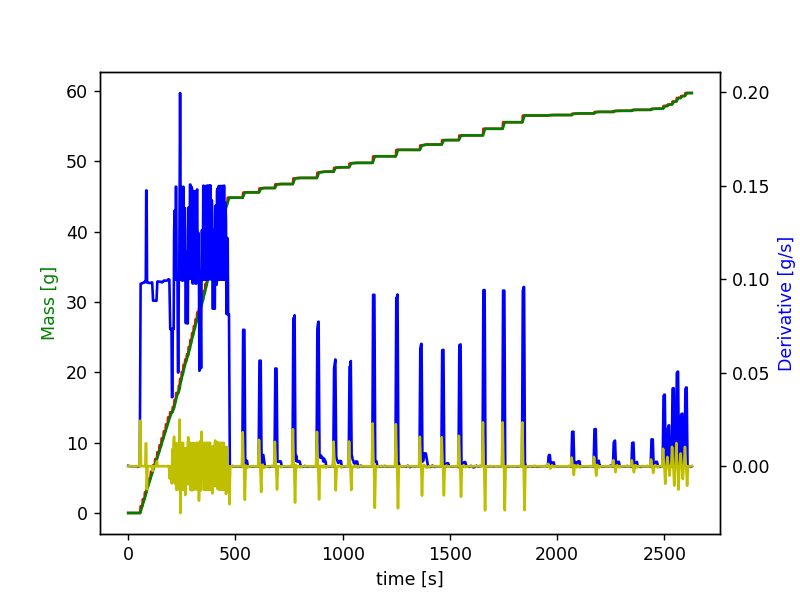

Addition of 0.758g Plantapon ACG 50 detected from 530s to 560s - expected volume = 0.739mL and actual volume = 0.67mL (resulting error is 9.222%)
Addition of 0.623g Plantapon ACG 50 detected from 606s to 640s - expected volume = 0.504mL and actual volume = 0.551mL (resulting error is 9.281%)
Addition of 0.572g Plantapon ACG 50 detected from 680s to 718s - expected volume = 0.504mL and actual volume = 0.506mL (resulting error is 0.386%)
Addition of 0.874g Plantapon ACG 50 detected from 764s to 806s - expected volume = 0.753mL and actual volume = 0.775mL (resulting error is 2.886%)
Addition of 0.893g Plantacare 818 detected from 876s to 928s - expected volume = 0.997mL and actual volume = 0.813mL (resulting error is 18.42%)
Addition of 0.627g Plantacare 818 detected from 954s to 1000s - expected volume = 0.519mL and actual volume = 0.578mL (resulting error is 11.368%)
Addition of 0.627g Plantacare 818 detected from 1026s to 1076s - expected volume = 0.519mL and actual volume = 0.578mL (r

In [3]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

#t2 = massProfile.defineIngredientsManually(specType='surfactant',steps=steps,show=True,manualTimes=[560,600,700,800,900,1000,1100,1150,1250,1320,1400,1500,1580,1650,1730,1830,1920,2000,2080,2140])

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.0018750000000000004 g/s and for 2nd derivative = 0.0004687500000000001 g/s^2


<IPython.core.display.Javascript object>


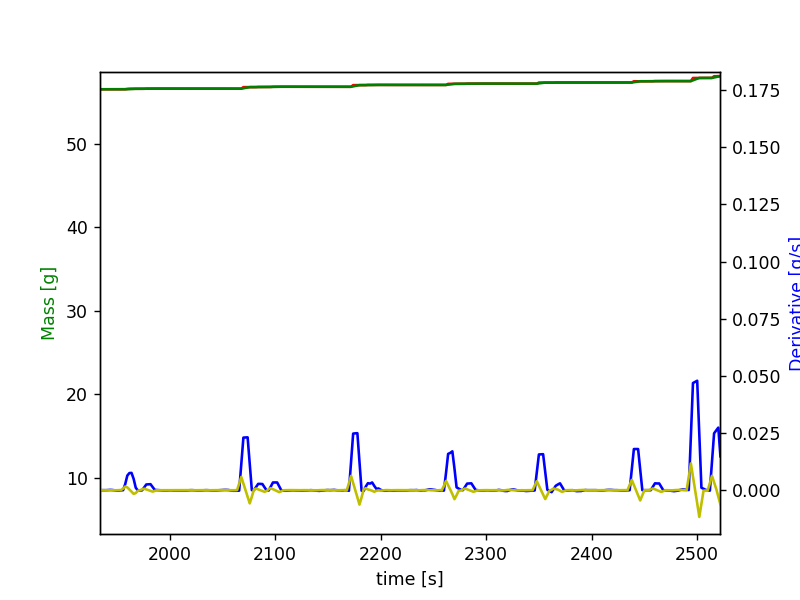

Addition of 0.08g Salcare Super 7 detected from 1954s to 1988s - expected volume = 0.093mL and actual volume = 0.072mL (resulting error is 22.33%)
Addition of 0.23g Salcare Super 7 detected from 2064s to 2108s - expected volume = 0.241mL and actual volume = 0.206mL (resulting error is 14.405%)
Addition of 0.225g Salcare Super 7 detected from 2168s to 2198s - expected volume = 0.185mL and actual volume = 0.2mL (resulting error is 8.113%)
Addition of 0.16g Salcare Super 7 detected from 2258s to 2292s - expected volume = 0.119mL and actual volume = 0.145mL (resulting error is 21.851%)
Addition of 0.141g Salcare Super 7 detected from 2344s to 2376s - expected volume = 0.102mL and actual volume = 0.125mL (resulting error is 23.355%)
Addition of 0.167g Salcare Super 7 detected from 2434s to 2470s - expected volume = 0.149mL and actual volume = 0.151mL (resulting error is 1.753%)


In [4]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

#t3 = massProfile.defineIngredientsManually(specType='polyelectrolyte',steps=steps,show=True,manualTimes=[2014,2112,2210,2314,2412,2494,2564])

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001 g/s^2


<IPython.core.display.Javascript object>


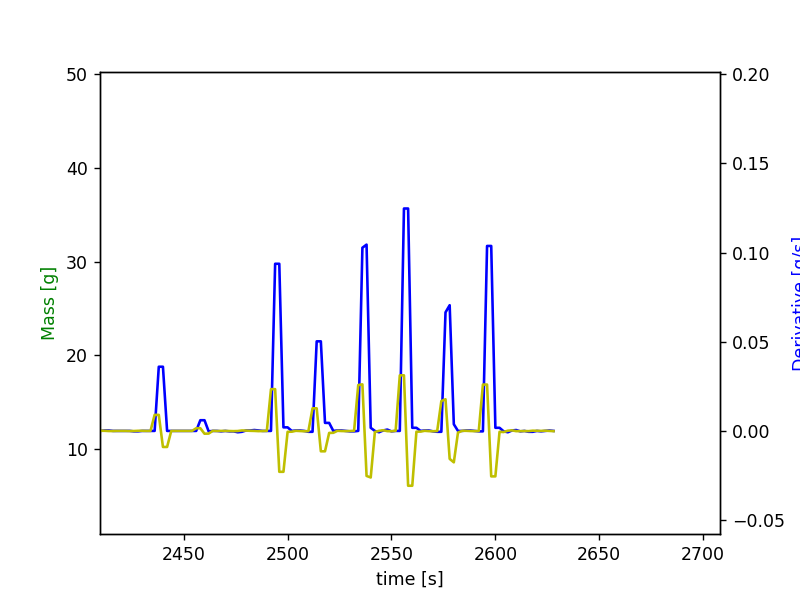

Addition of 0.383g Arlypon F detected from 2490s to 2502s - expected volume = 0.438mL and actual volume = 0.438mL (resulting error is 0.0%)
Addition of 0.218g Arlypon F detected from 2510s to 2526s - expected volume = 0.22mL and actual volume = 0.247mL (resulting error is 12.371%)
Addition of 0.416g Arlypon F detected from 2532s to 2544s - expected volume = 0.456mL and actual volume = 0.467mL (resulting error is 2.34%)
Addition of 0.505g Arlypon F detected from 2552s to 2564s - expected volume = 0.553mL and actual volume = 0.578mL (resulting error is 4.658%)
Addition of 0.279g Arlypon F detected from 2572s to 2584s - expected volume = 0.294mL and actual volume = 0.314mL (resulting error is 6.897%)
Addition of 0.42g Arlypon F detected from 2592s to 2604s - expected volume = 0.452mL and actual volume = 0.482mL (resulting error is 6.726%)


In [5]:
# default bl_mult = 1, default mergeSens = 1
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=1, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

#t4 = massProfile.defineIngredientsManually(specType='thickener',steps=steps,show=True,manualTimes=[2780,2834,2844,2848,2862,2884,2906])

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_290523_S541-S546.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_36020\4269101412.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
540,541.0,0.0,7.591909,0.0,0.000000,0.0,9.445817,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.801257,3.836017,0.0
541,542.0,0.0,0.000000,0.0,9.072509,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,9.571177,0.0,0.0,0.0,2.338459,2.214046,0.0
542,543.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,9.147963,0.00000,0.0,0.000000,0.0,9.375390,0.0,0.0,0.0,2.243101,4.144563,0.0
543,544.0,0.0,11.641452,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,12.726598,0.0,0.000000,0.0,0.0,0.0,1.554905,4.924068,0.0
544,545.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,7.76977,0.0,0.000000,0.0,9.728962,0.0,0.0,0.0,1.427520,2.832200,0.0
545,546.0,0.0,8.448194,0.0,12.128260,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.613958,4.066933,0.0
